# Project Definition
## Hypothetical AI Problem: Predicting student dropout rates in online universities.

### Objectives:
- Identify at-risk students early.
- Recommend personalized interventions.
- Improve student retention rates.
### Stakeholders:
- Academic Advisors
- University Administration
### Key Performance Indicator (KPI):
- Dropout prediction accuracy (e.g., 90% correctly identified dropouts within the semester)


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

sns.set_theme(style="darkgrid")

In [31]:
students = pd.read_csv('../data/data.csv', sep=";")
students = janitor.clean_names(students)
students.head(10)

,marital_status,application_mode,application_order,course,daytime_evening_attendance\t,previous_qualification,previous_qualification_grade_,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited_,curricular_units_2nd_sem_enrolled_,curricular_units_2nd_sem_evaluations_,curricular_units_2nd_sem_approved_,curricular_units_2nd_sem_grade_,curricular_units_2nd_sem_without_evaluations_,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [32]:
students.columns.sort_values(ascending=True)

Index(['admission_grade', 'age_at_enrollment', 'application_mode',
       'application_order', 'course', 'curricular_units_1st_sem_approved_',
       'curricular_units_1st_sem_credited_',
       'curricular_units_1st_sem_enrolled_',
       'curricular_units_1st_sem_evaluations_',
       'curricular_units_1st_sem_grade_',
       'curricular_units_1st_sem_without_evaluations_',
       'curricular_units_2nd_sem_approved_',
       'curricular_units_2nd_sem_credited_',
       'curricular_units_2nd_sem_enrolled_',
       'curricular_units_2nd_sem_evaluations_',
       'curricular_units_2nd_sem_grade_',
       'curricular_units_2nd_sem_without_evaluations_',
       'daytime_evening_attendance\t', 'debtor', 'displaced',
       'educational_special_needs', 'fathers_occupation',
       'fathers_qualification', 'gdp', 'gender', 'inflation_rate',
       'international', 'marital_status', 'mothers_occupation',
       'mothers_qualification', 'nacionality', 'previous_qualification',
       'previous

In [33]:
students.isnull().sum()

marital_status                                   0
application_mode                                 0
application_order                                0
course                                           0
daytime_evening_attendance\t                     0
previous_qualification                           0
previous_qualification_grade_                    0
nacionality                                      0
mothers_qualification                            0
fathers_qualification                            0
mothers_occupation                               0
fathers_occupation                               0
admission_grade                                  0
displaced                                        0
educational_special_needs                        0
debtor                                           0
tuition_fees_up_to_date                          0
gender                                           0
scholarship_holder                               0
age_at_enrollment              

In [34]:
num_columns = students.select_dtypes(exclude=['object']).columns.tolist()
cat_columns = students.select_dtypes(include=['object']).columns.tolist()
print(num_columns)
print(cat_columns)

['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance\t', 'previous_qualification', 'previous_qualification_grade_', 'nacionality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited_', 'curricular_units_1st_sem_enrolled_', 'curricular_units_1st_sem_evaluations_', 'curricular_units_1st_sem_approved_', 'curricular_units_1st_sem_grade_', 'curricular_units_1st_sem_without_evaluations_', 'curricular_units_2nd_sem_credited_', 'curricular_units_2nd_sem_enrolled_', 'curricular_units_2nd_sem_evaluations_', 'curricular_units_2nd_sem_approved_', 'curricular_units_2nd_sem_grade_', 'curricular_units_2nd_sem_without_evaluations_', 'unemployment_rate', 'inflation_rate', 'gdp']
['target']


In [35]:
corr_matrix = students[num_columns].corr()
print(corr_matrix)

                                               marital_status  \
marital_status                                       1.000000   
application_mode                                     0.264006   
application_order                                   -0.125854   
course                                               0.046365   
daytime_evening_attendance\t                        -0.274939   
previous_qualification                               0.062529   
previous_qualification_grade_                       -0.022406   
nacionality                                         -0.008843   
mothers_qualification                                0.193163   
fathers_qualification                                0.130353   
mothers_occupation                                   0.034994   
fathers_occupation                                   0.031609   
admission_grade                                     -0.004771   
displaced                                           -0.234886   
educational_special_needs

/home/jeremy/Documents/PLP/week-five-ai-dev-workflow/venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/jeremy/Documents/PLP/week-five-ai-dev-workflow/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


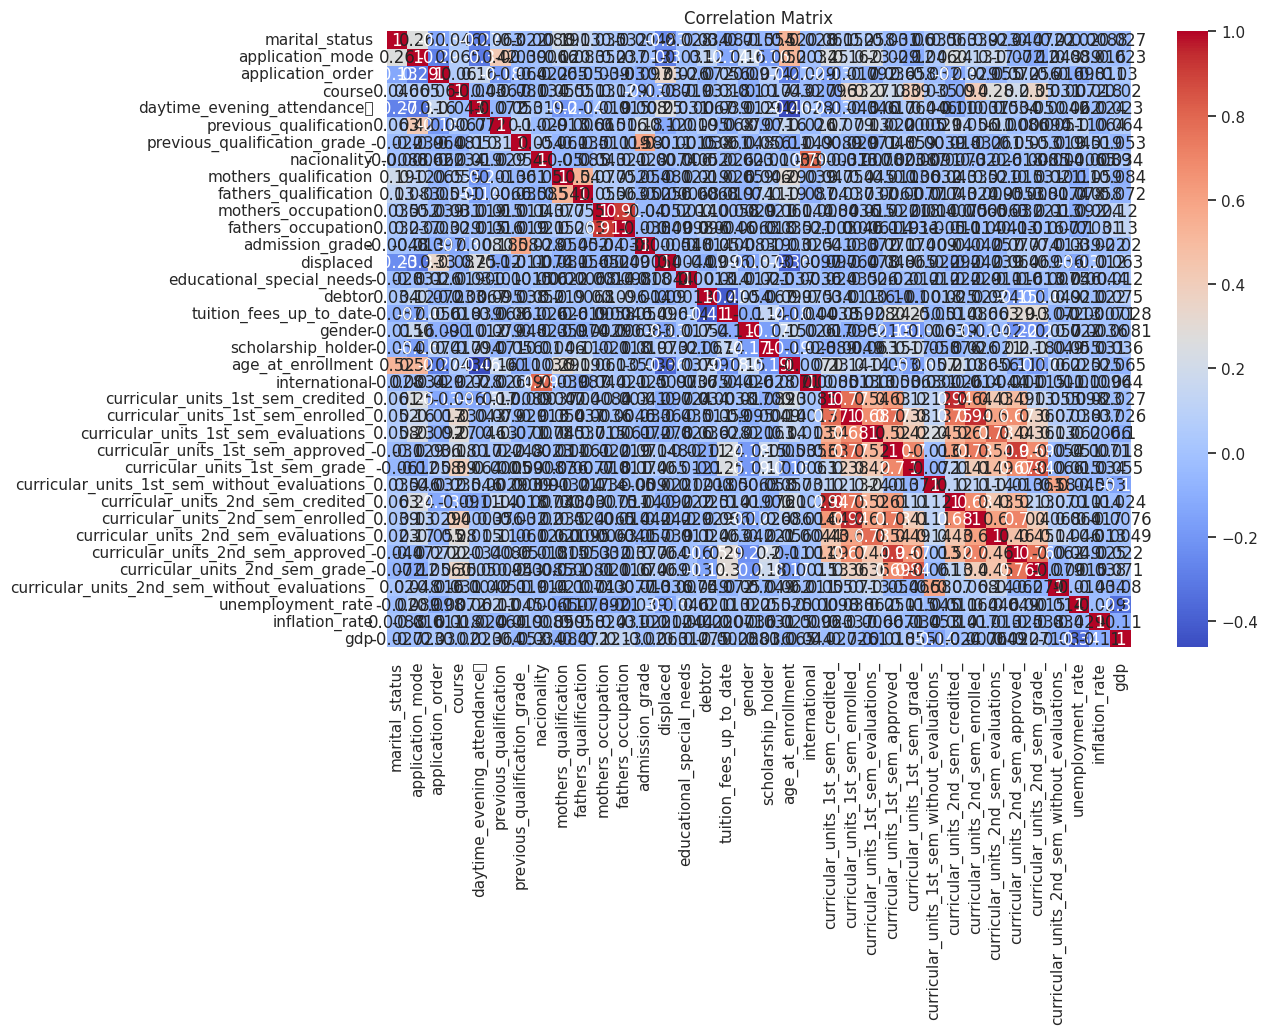

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

In [38]:
students['target_numeric'] = students['target'].map({'Graduate': 1, 'Dropout': 0})
students.target_numeric

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4419    1.0
4420    0.0
4421    0.0
4422    1.0
4423    1.0
Name: target_numeric, Length: 4424, dtype: float64

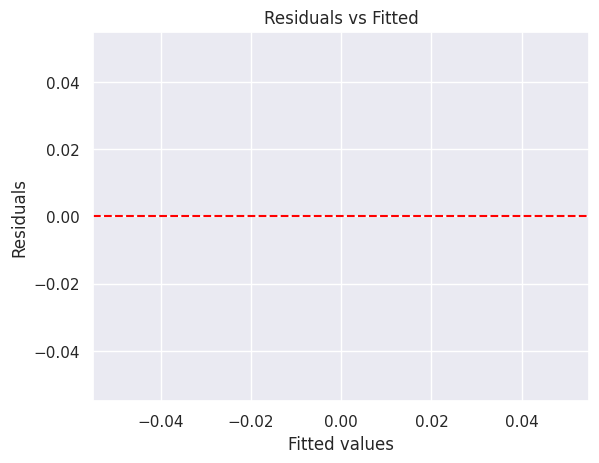

In [39]:

X = students.drop(columns=['target', 'target_numeric'], axis=1)  # replace 'target_column' with your actual target
y = students['target_numeric']

# Convert to numeric types (very important)
X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values (if any were coerced to NaN)
# data = pd.concat([X, y], axis=1).dropna()
# X = data.drop(columns=['target'])
# y = data['target']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [40]:
students['target_numeric'] = students['target'].map({'Graduate': 1, 'Dropout': 0})
y = students['target']
print(y)

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: target, Length: 4424, dtype: object


In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
students = students.drop(columns='target', axis=1)
num_columns = students.select_dtypes(exclude=['object']).columns.tolist()
cat_columns = students.select_dtypes(include=['object']).columns.tolist()

In [48]:
print(students.columns.tolist())

['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance\t', 'previous_qualification', 'previous_qualification_grade_', 'nacionality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited_', 'curricular_units_1st_sem_enrolled_', 'curricular_units_1st_sem_evaluations_', 'curricular_units_1st_sem_approved_', 'curricular_units_1st_sem_grade_', 'curricular_units_1st_sem_without_evaluations_', 'curricular_units_2nd_sem_credited_', 'curricular_units_2nd_sem_enrolled_', 'curricular_units_2nd_sem_evaluations_', 'curricular_units_2nd_sem_approved_', 'curricular_units_2nd_sem_grade_', 'curricular_units_2nd_sem_without_evaluations_', 'unemployment_rate', 'inflation_rate', 'gdp', 'target_numeric']


In [49]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

students_comb = students[num_columns + cat_columns]
students_processed = preprocessor.fit_transform(students_comb)

In [50]:
print(students_processed.shape)

(4424, 37)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X = students_processed
y = students['target_numeric'].fillna()

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)
X_val, X_text, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42, stratify=y_temp)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Validation Performance
y_val_pred = rf_model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

ValueError: Input y contains NaN.

In [ ]:
# Remove rows where target is NaN
mask = ~np.isnan(students['target_numeric'])
X = students_processed[mask]
y = students['target_numeric'][mask]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Validation Performance
y_val_pred = rf_model.predict(X_val)
print('Validation Accuracy:', accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Test Performance
y_test_pred = rf_model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       213
         1.0       1.00      1.00      1.00       331

    accuracy                           1.00       544
   macro avg       1.00      1.00      1.00       544
weighted avg       1.00      1.00      1.00       544

Test Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       213
         1.0       1.00      1.00      1.00       332

    accuracy                           1.00       545
   macro avg       1.00      1.00      1.00       545
weighted avg       1.00      1.00      1.00       545



#### Key Points:
- **Validation Accuracy: 1.0 and Test Accuracy: 1.0**
    - The model predicted every sample correctly (100% accuracy) on both sets.
- **Precision, Recall, F1-score (for both classes 0.0 and 1.0): 1.00**
    - For both 'Dropout' (0.0) and 'Graduate' (1.0), the model made no mistakes:
        - **Precision**: Of all predicted as a class, how many were correct.
        - **Recall**: Of all actual class members, how many were found.
        - **F1-score**: Harmonic mean of precision and recall.
- **Support**: Number of true samples for each class.

#### Interpretation:
- The model is perfectly classifying both classes on both validation and test sets.
- This is extremely rare in real-world data and may indicate:
    - The task is very easy,
    - There is data leakage (the model has access to information it shouldn’t), 
    - Or the dataset is not representative.

#### Recommendation:
- Double-check your data and pipeline to ensure there is no leakage or label duplication. Perfect scores are uncommon and should be investigated.

In [57]:
students['target_numeric']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4419    1.0
4420    0.0
4421    0.0
4422    1.0
4423    1.0
Name: target_numeric, Length: 4424, dtype: float64